# Deep Learning with Python

## What is deep learning?

### Open Source Libraries for Deep Learning

desired features of deep learning framework.
* Covers the main architectures (fully connected, convolutional, and recurrent)
* Flexible and fast prototyping
* Compile to run on GPU

popular frameworks
* caffe
* Keras: totally written in Python. Run TensorFlow or Theano.
* Lasagne: API different.
* Blocks, also use Theano in backend.

### "Hello World!" classifying the MNIST Data

MNIST dataset

Training deep neural networks with Keras

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(123)

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
batch_size = 128
nb_classes = 10 # 10 digits from 0 to 9

#input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between tran and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape data
X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255
print("X_train shape: ", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("One hot encoding :{}".format(Y_train[0,:]))

X_train shape:  (60000, 1, 28, 28)
60000 train samples
10000 test samples
One hot encoding :[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


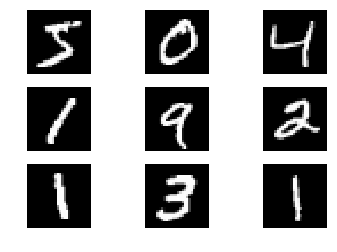

In [5]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i,0], cmap = "gray")
    plt.axis("off")

model definition: iput image, return a probability that it belongs one of the classes from 0 to 9.

In [6]:
model = Sequential()

# Convolution2D(number_filters, row_size, column_size, input_shape=(number_channels, img_row, img_col))
model.add(Convolution2D(6, 5, 5, input_shape = (1, img_rows, img_cols), border_mode = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(16,5,5, border_mode = "same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(120,5,5, border_mode = "same"))
model.add(Activation("relu"))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(84))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

train

In [7]:
model.compile(loss = "categorical_crossentropy", optimizer="adadelta")

In [8]:
nb_epoch = 2 #try increasing this number

model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch, show_accuracy=True,
         verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
  384/60000 [..............................] - ETA: 41021s - loss: 3.0294 - acc: 0.1120

KeyboardInterrupt: 

In [ ]:
res = model.predict_classes(X_test[:9])
plt.figure(figsize = (10,10))

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i,0], cmap = "gray")
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" %res[i], fontsize=18)